# Regresión Polinómica
###### https://www.chreinvent.com/recursos/regresi%C3%B3n-no-lineal

Supongamos que queremos ajustar una regresión polinómica de grado 3 para modelar la relación entre 𝑋 e  𝑌 en un conjunto de datos.

**Paso 1: Crear datos de ejemplo**

Primero, generamos datos de ejemplo con una relación no lineal.

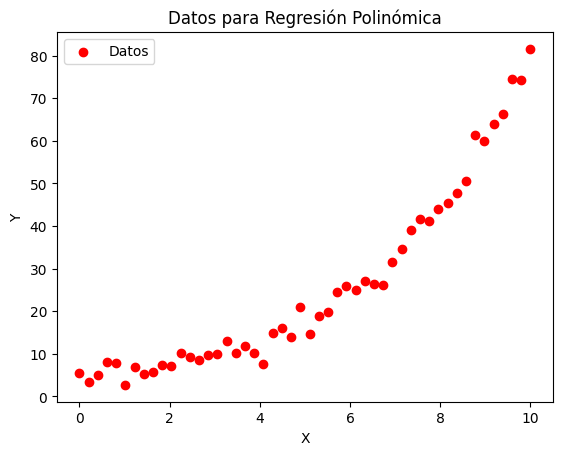

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Crear datos de ejemplo
np.random.seed(0)
X = np.linspace(0, 10, 50).reshape(-1, 1)
Y = 2 + 3*X - 0.5*X**2 + 0.1*X**3 + np.random.normal(0, 2, X.shape)

# Graficar los datos
plt.scatter(X, Y, color="red", label="Datos")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Datos para Regresión Polinómica")
plt.legend()
plt.show()


**Paso 2: Transformar las características**

Creamos una matriz de características donde incluimos 𝑋, 𝑋2, 𝑋3, etc., hasta el grado que queremos ajustar.

In [3]:
# Generar características polinómicas de grado 3
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)


**Paso 3: Ajustar el modelo de regresión lineal**

Utilizamos LinearRegression de sklearn, que ahora ajustará el modelo sobre las características transformadas.

In [4]:
# Ajustar el modelo lineal con características polinómicas
model = LinearRegression()
model.fit(X_poly, Y)

# Parámetros obtenidos
coeficientes = model.coef_
intercepto = model.intercept_
print(f"Coeficientes: {coeficientes}")
print(f"Intercepto: {intercepto}")


Coeficientes: [[ 0.          1.74305715 -0.28199097  0.08669514]]
Intercepto: [4.61880805]


**Paso 4: Realizar predicciones y graficar el ajuste**

Usamos el modelo para predecir valores de 𝑌 a partir de los valores de 𝑋 y luego graficamos la curva ajustada.

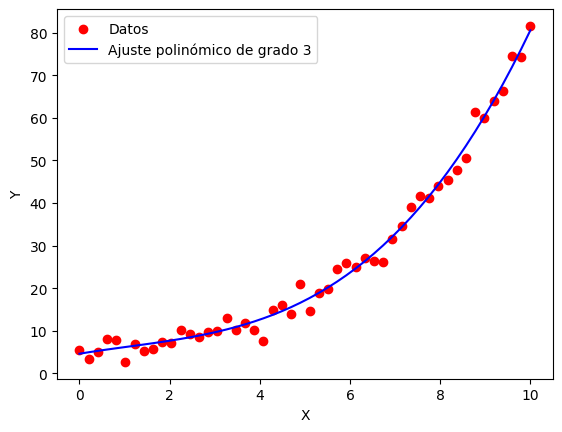

In [5]:
# Predicciones
Y_pred = model.predict(X_poly)

# Graficar los datos originales y el ajuste
plt.scatter(X, Y, color="red", label="Datos")
plt.plot(X, Y_pred, color="blue", label=f"Ajuste polinómico de grado 3")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


**Paso 5: Evaluación del modelo**

Podemos evaluar el modelo con métricas como el error cuadrático medio (MSE) para ver qué tan bien ajusta los datos.

In [6]:
# Evaluación del modelo
mse = mean_squared_error(Y, Y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# Calcular y mostrar R^2
r2_score = model.score(X_poly, Y)
print(f"Coeficiente de determinación R^2: {r2_score}")


Error cuadrático medio (MSE): 4.284469469535701
Coeficiente de determinación R^2: 0.9908475723112274


**Interpretación en términos de error promedio** 
+ Dado que el MSE es el promedio de los errores al cuadrado, se puede usar la raíz cuadrada del MSE (o RMSE, por sus siglas en inglés) para entender el error en unidades originales. 
+ Esto es útil para tener una interpretación en la misma escala que 𝑌:

RMSE = √MSE = √4.284 ≈ 2.07

Esto significa que, en promedio, los valores predichos 𝑌^  están a una distancia de aproximadamente 2.07 unidades de los valores reales 𝑌.

**Comparación con otros modelos** 

Otro enfoque es comparar el MSE de este modelo con el de otros modelos (por ejemplo, regresión lineal simple o polinómica de otro grado) 
+ para ver si la complejidad añadida en este modelo de grado 3 realmente reduce el error.

**Juicio de calidad del ajuste**

Un MSE de 4.28 puede considerarse bueno si:

1. El rango de valores de 𝑌 no es muy pequeño.
2. No hay un modelo alternativo que reduzca el MSE de manera significativa sin caer en sobreajuste.

**Coeficiente de determinación**
Este coeficiente es ≈ 1 lo cual es un indicio de buena calidad de ajuste del modelo si se lo agrega a la interpretación del RMSE

________________________________________